In [ ]:
#!pip install pysus
#!pip install geopandas

Vamos trabalhar com o pacote pysus, que tem acesso as bases de dados como do SINAN.

In [ ]:
from pysus.ftp.databases.sinan import SINAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pysus.preprocessing.decoders import decodifica_idade_SINAN



In [ ]:
sinan = SINAN().load()

Como os dados de acidente de trabalho são disponiveis de 2006 a 2024, vamos coletar todos esses dados

In [ ]:
# Definir o intervalo de anos de 2006 a 2024
anos = range(2006, 2025)

# Inicializar uma lista para armazenar os DataFrames
dfs_acgr = []
dfs_acbi = []
# Iterar pelos anos e baixar os dados correspondentes
for ano in anos:
    # Baixar os arquivos para o ano específico
    df_acgr_ano = sinan.download(sinan.get_files('acgr', ano)).to_dataframe()
    df_acbi_ano = sinan.download(sinan.get_files('acbi', ano)).to_dataframe()

    # Adicionar o DataFrame à lista
    dfs_acgr.append(df_acgr_ano)
    dfs_acbi.append(df_acbi_ano)

# Concatenar todos os DataFrames em um único
df_acgr = pd.concat(dfs_acgr, ignore_index=True)
df_acbi = pd.concat(dfs_acbi, ignore_index=True)
# Agora df_final contém os dados de todos os anos com a coluna 'ano' adicional


56132it [00:00, 27878587.58it/s]     
28326it [00:00, 16702917.91it/s]     
809403it [00:00, 367411497.89it/s]   
673314it [00:00, 356036762.92it/s]   
1282584it [00:00, 696922814.03it/s]  
1048406it [00:00, 868523302.28it/s]  
1722960it [00:00, 893940873.31it/s]  
1493392it [00:00, 501099203.13it/s]  
2177654it [00:00, 1231128572.96it/s] 
1632311it [00:00, 1871114664.26it/s] 
3111248it [00:00, 1998701168.85it/s] 
2003697it [00:00, 1115343641.92it/s] 
3792309it [00:00, 2076242893.61it/s] 
2262385it [00:00, 2702685974.09it/s] 
4385977it [00:00, 2197338852.72it/s] 
2458965it [00:00, 1276283471.77it/s] 
4232390it [00:00, 4894383872.78it/s] 
2663409it [00:00, 4827634841.11it/s] 
4442569it [00:00, 5143109281.53it/s] 
2757368it [00:00, 3238655735.61it/s] 
4567899it [00:00, 5507087395.03it/s] 
2918481it [00:00, 3374964580.16it/s] 
5002413it [00:00, 5355191642.56it/s] 
3139906it [00:00, 5047803869.46it/s] 
5103210it [00:00, 5749238279.84it/s] 
3305202it [00:00, 3527486506.21it/s] 
5773007it [0

In [ ]:
df_acgr_cru = df_acgr.copy()
df_acgr_cru.replace('', np.nan, inplace=True)

In [ ]:
from google.colab import files

# Salvar o DataFrame como CSV
df_acgr_cru.to_csv('df_acgr.csv', index=False)

# Baixar o arquivo
files.download('df_acgr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Algumas variáveis numéricas vem codificadas, para o caso de uso o pacote conta com alguns decodificadores prontos.

In [ ]:

df_acgr['idade_anos'] = decodifica_idade_SINAN(df_acgr.NU_IDADE_N, 'Y')
df_acbi['idade_anos'] = decodifica_idade_SINAN(df_acbi.NU_IDADE_N, 'Y')

Aqui filtramos as colunas que vamos considerar para acelerar qualquer processamento feito.

In [ ]:
# Colunas que você deseja preservar
colunas_desejadas = [
    'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO', 'SG_UF_NOT', 'idade_anos',
    'ID_OCUPA_N', 'TERCEIRIZA', 'CNAE', 'PART_CORP1', 'PART_CORP2',
    'PART_CORP3', 'CID_LESAO', 'REGIME', 'EVOLUCAO', 'DT_OBITO', 'CAT'
]

# Sobrescrevendo o DataFrame original com as colunas selecionadas
df_acgr = df_acgr[colunas_desejadas]

# Colunas que você deseja preservar
colunas_desejadas = [
    'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO', 'SG_UF_NOT', 'idade_anos',
    'ID_OCUPA_N', 'CS_SEXO', 'TERCEIRIZA',   'LUVA', 'AVENTAL', 'OCULOS', 'MASCARA', 'FACIAL',
    'BOTA', 'EVOLUCAO', 'DT_OBITO', 'CAT'
]
# Sobrescrevendo o DataFrame original com as colunas selecionadas
df_acbi = df_acbi[colunas_desejadas]

Os valores não preenchidos vem com valor padrão '', portanto vamos trocar por NaN para melhor tratamento.

In [ ]:


# Substituindo espaços em branco por NaN
df_acgr.replace('', np.nan, inplace=True)
df_acbi.replace('', np.nan, inplace=True)

A primeira variável de interesse é o total de casos por mês. Vamos analisar no caso do Brasil inteiro.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertendo DT_NOTIFIC para datetime em ambos os DataFrames
for df in [df_acgr, df_acbi]:
    df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], format='%Y/%m/%d', errors='coerce')
    df['Ano_Mes'] = df['DT_NOTIFIC'].dt.to_period('M')

# Contando casos por mês
casos_acgr = df_acgr.groupby('Ano_Mes').size().reset_index(name='Total_Casos_ACGR')
casos_acbi = df_acbi.groupby('Ano_Mes').size().reset_index(name='Total_Casos_ACBI')

# Convertendo 'Ano_Mes' para datetime para plotagem
casos_acgr['Ano_Mes'] = casos_acgr['Ano_Mes'].dt.to_timestamp()
casos_acbi['Ano_Mes'] = casos_acbi['Ano_Mes'].dt.to_timestamp()




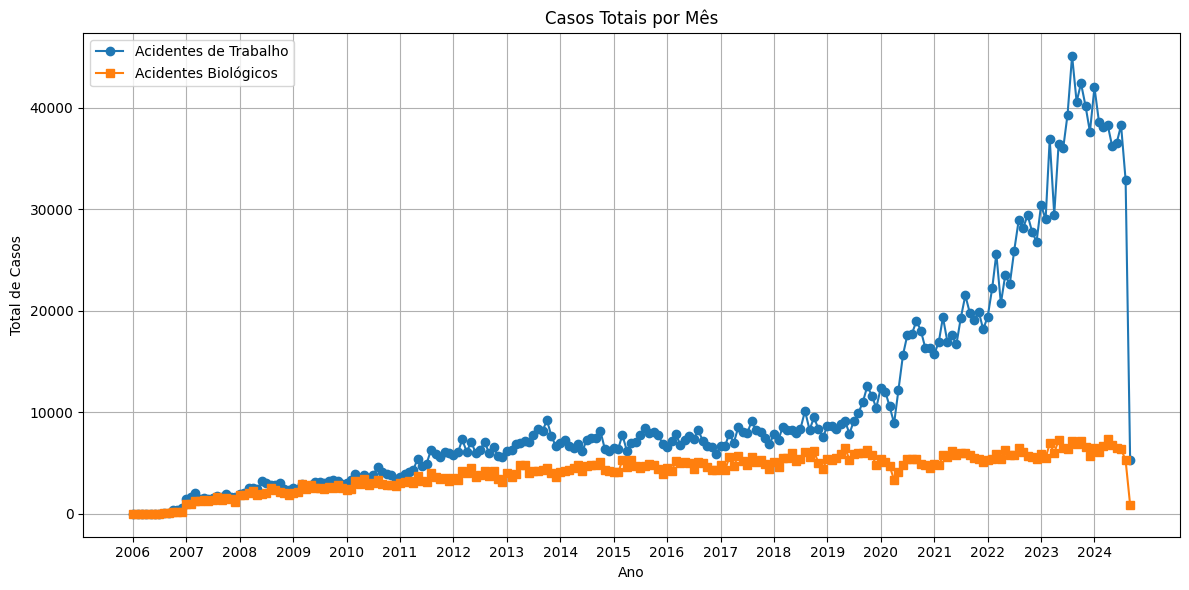

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(12,6))
plt.plot(casos_acgr['Ano_Mes'], casos_acgr['Total_Casos_ACGR'], marker='o', label='Acidentes de Trabalho')
plt.plot(casos_acbi['Ano_Mes'], casos_acbi['Total_Casos_ACBI'], marker='s', label='Acidentes Biológicos')

# Ajustando os ticks para exibir apenas os anos
anos = casos_acgr['Ano_Mes'].dt.year.unique()
plt.xticks(ticks=[pd.Timestamp(f'{ano}') for ano in anos], labels=anos)

plt.title('Casos Totais por Mês')
plt.xlabel('Ano')
plt.ylabel('Total de Casos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

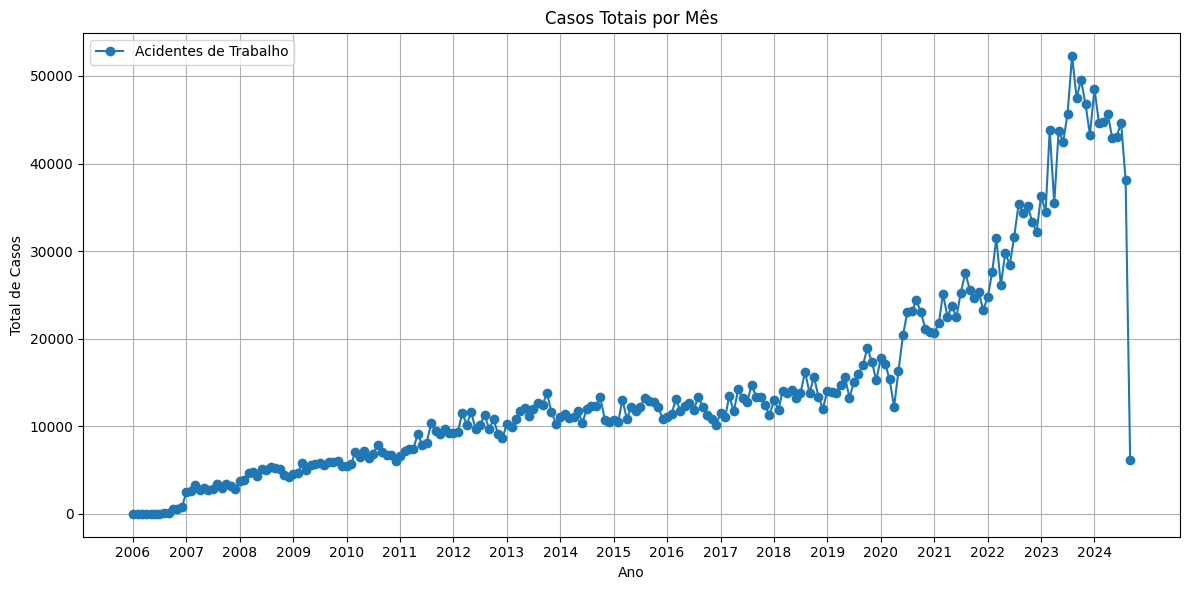

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(12,6))
plt.plot(casos_acgr['Ano_Mes'], casos_acgr['Total_Casos_ACGR']+casos_acbi['Total_Casos_ACBI'], marker='o', label='Acidentes de Trabalho')

# Ajustando os ticks para exibir apenas os anos
anos = casos_acgr['Ano_Mes'].dt.year.unique()
plt.xticks(ticks=[pd.Timestamp(f'{ano}') for ano in anos], labels=anos)

plt.title('Casos Totais por Mês')
plt.xlabel('Ano')
plt.ylabel('Total de Casos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

E para cada UF

In [ ]:
# Criando cópias dos DataFrames
df_acgr_copy = df_acgr.copy()
df_acbi_copy = df_acbi.copy()

In [ ]:
# Garantindo que os valores estejam em formato string e com dois dígitos
df_acgr_copy['SG_UF_NOT'] = df_acgr_copy['SG_UF_NOT'].astype(str).str.zfill(2)
df_acbi_copy['SG_UF_NOT'] = df_acbi_copy['SG_UF_NOT'].astype(str).str.zfill(2)


# Dicionário de códigos IBGE para siglas de UF
codigo_uf_para_sigla = {
    '12': 'AC', '27': 'AL', '13': 'AM', '16': 'AP', '29': 'BA',
    '23': 'CE', '53': 'DF', '32': 'ES', '52': 'GO', '21': 'MA',
    '51': 'MT', '50': 'MS', '15': 'PA', '25': 'PB', '26': 'PE',
    '22': 'PI', '41': 'PR', '33': 'RJ', '24': 'RN', '43': 'RS',
    '11': 'RO', '14': 'RR', '42': 'SC', '28': 'SE', '35': 'SP',
    '17': 'TO'
}

# Aplicando o mapeamento de códigos IBGE para siglas de UF
df_acgr_copy['SG_UF_NOT'] = df_acgr_copy['SG_UF_NOT'].map(codigo_uf_para_sigla)
df_acbi_copy['SG_UF_NOT'] = df_acbi_copy['SG_UF_NOT'].map(codigo_uf_para_sigla)


   UF  Total_Casos_ACGR  Total_Casos_ACBI
0  AC              1895               215
1  AL              3288              1130
2  AM              1926               848
3  AP               687               204
4  BA             13983              3790


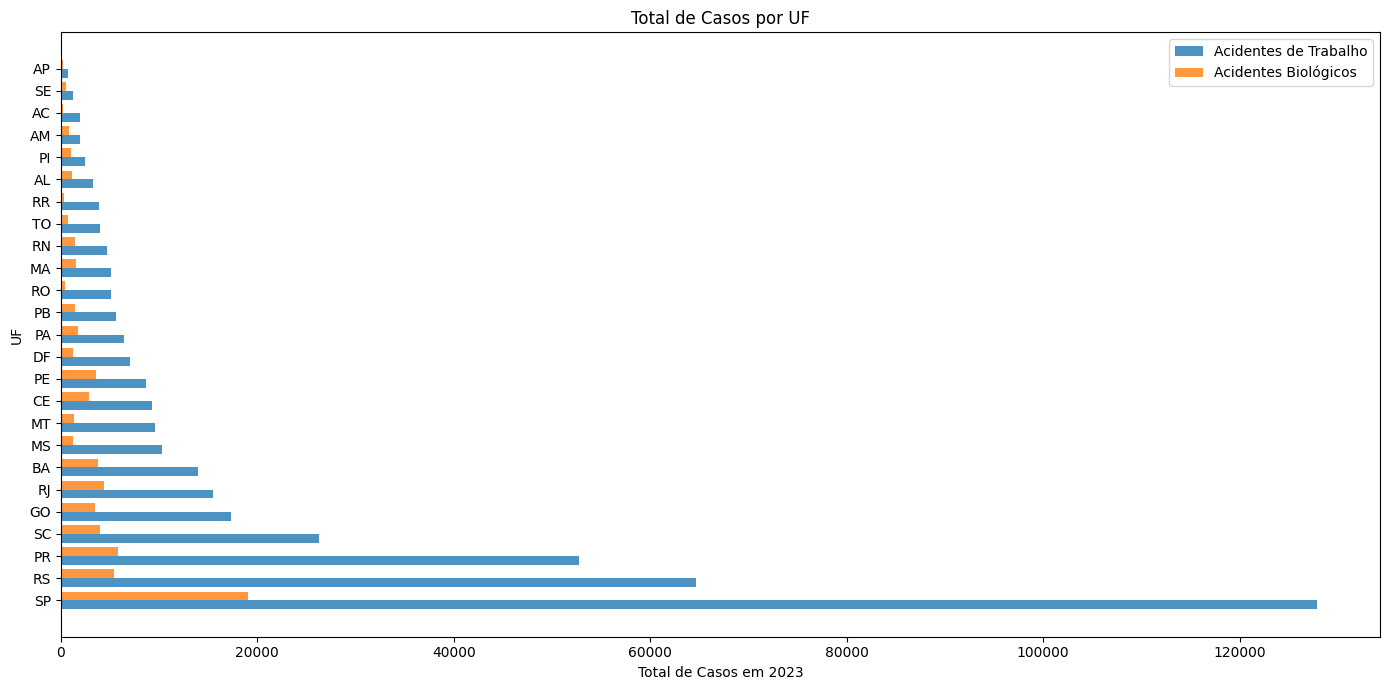

In [ ]:
df_acgr_2023 = df_acgr_copy[df_acgr_copy['NU_ANO'] == '2023']
df_acbi_2023= df_acbi_copy[df_acbi_copy['NU_ANO'] == '2023']

# Contando casos por UF em ambos os DataFrames
casos_uf_acgr = df_acgr_2023['SG_UF_NOT'].value_counts().reset_index()
casos_uf_acgr.columns = ['UF', 'Total_Casos_ACGR']

casos_uf_acbi = df_acbi_2023['SG_UF_NOT'].value_counts().reset_index()
casos_uf_acbi.columns = ['UF', 'Total_Casos_ACBI']

# Mesclando os dois DataFrames para um gráfico conjunto
casos_uf = pd.merge(casos_uf_acgr, casos_uf_acbi, on='UF', how='outer').fillna(0)

print(casos_uf.head())

# Ordenando por total de acidentes de trabalho
casos_uf = casos_uf.sort_values(by='Total_Casos_ACGR', ascending=False)

# Plotando gráfico de barras horizontal
plt.figure(figsize=(14,7))
bar_width = 0.4
y = range(len(casos_uf))

plt.barh(y, casos_uf['Total_Casos_ACGR'], height=bar_width, label='Acidentes de Trabalho', alpha=0.8)
plt.barh([i + bar_width for i in y], casos_uf['Total_Casos_ACBI'], height=bar_width, label='Acidentes Biológicos', alpha=0.8)

# Ajustes do gráfico
plt.xlabel('Total de Casos em 2023')
plt.ylabel('UF')
plt.title('Total de Casos por UF')
plt.yticks([i + bar_width / 2 for i in y], casos_uf['UF'])
plt.legend()
plt.tight_layout()
plt.show()

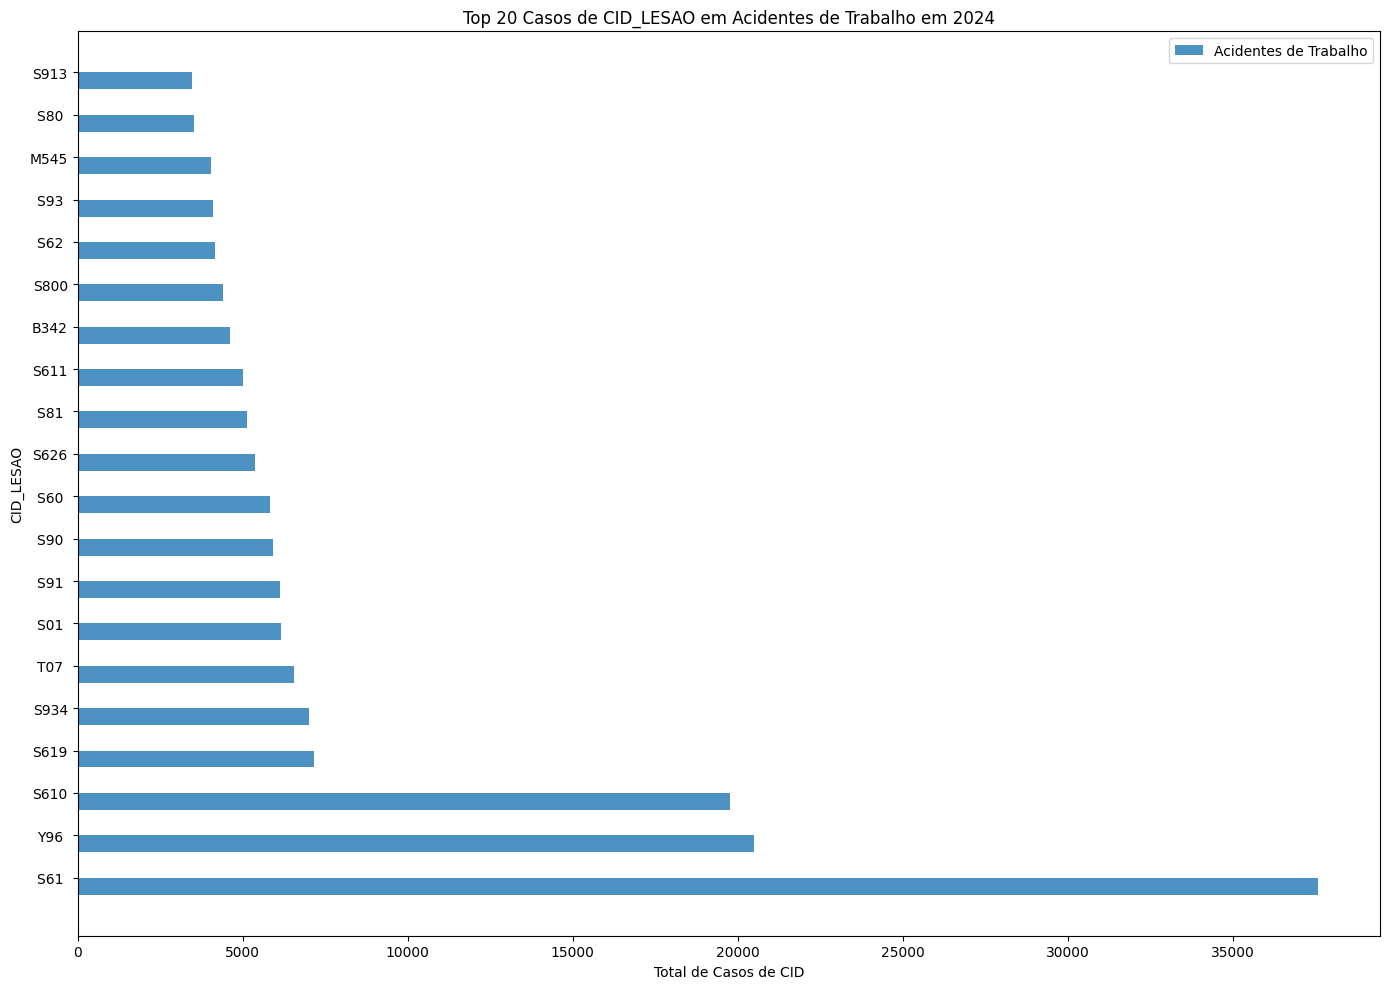

In [ ]:

# Contando casos por CID_LESAO no DataFrame de acidentes de trabalho
casos_cid_acgr_2023 = df_acgr_2023['CID_LESAO'].value_counts().reset_index()
casos_cid_acgr_2023.columns = ['CID_LESAO', 'Total_Casos_ACGR']

# Filtrando os top 20 CIDs
top_20_cid_2023 = casos_cid_acgr_2023.head(20)

# Plotando gráfico de barras horizontal
plt.figure(figsize=(14,10))
bar_width = 0.4
y = range(len(top_20_cid_2023))

plt.barh(y, top_20_cid_2023['Total_Casos_ACGR'], height=bar_width, label='Acidentes de Trabalho', alpha=0.8)

# Ajustes do gráfico
plt.xlabel('Total de Casos de CID')
plt.ylabel('CID_LESAO')
plt.title('Top 20 Casos de CID_LESAO em Acidentes de Trabalho em 2024')

# Criando os ticks no eixo Y com os CIDs mais frequentes
plt.yticks([i + bar_width / 2 for i in y], top_20_cid_2023['CID_LESAO'])

plt.legend()
plt.tight_layout()
plt.show()

Repare que S61 é ferimento na mão. Y96 qualquer lesão generica por condição de trabalho e não traz muita informação. S610 é ferimento nos dedos e 619 no punho, portanto em sua grande maioria as lesões são relacionadas a mão e provavelmente associada a trabalhos manuais.

In [ ]:
df_acgr['TERCEIRIZA'].value_counts()
## 1 é terceirizado
## 2 não é
## 3 não se aplica

,count
TERCEIRIZA,
2,1459703
9,258290
1,105021
3,75761


In [ ]:
df_acbi['TERCEIRIZA'].value_counts()

,count
TERCEIRIZA,
2,571878
1,91273
9,79138
3,49731


In [ ]:
# Função para calcular a porcentagem de '1' em relação a '2' e '3'
def calcular_porcentagem_1(df, coluna):
    count_1 = (df[coluna] == '1').sum()  # Contando o número de '1'
    count_2_3 = ((df[coluna] == '2') | (df[coluna] == '3')).sum()  # Contando os valores '2' e '3'

    # Evitando divisão por zero
    if count_2_3 == 0:
        return 0
    return (count_1 / count_2_3) * 100  # Calculando a porcentagem

# Calculando a porcentagem para 'TERCEIRIZA' no df_acgr
porcentagem_acgr = calcular_porcentagem_1(df_acgr_copy, 'TERCEIRIZA')

# Calculando a porcentagem para 'TERCEIRIZA' no df_acbi
porcentagem_acbi = calcular_porcentagem_1(df_acbi_copy, 'TERCEIRIZA')

# Exibindo os resultados
print("Porcentagem de '1' por '2' e '3' em 'TERCEIRIZA' no df_acgr:", porcentagem_acgr)
print("Porcentagem de '1' por '2' e '3' em 'TERCEIRIZA' no df_acbi:", porcentagem_acbi)


Porcentagem de '1' por '2' e '3' em 'TERCEIRIZA' no df_acgr: 6.839691454830592
Porcentagem de '1' por '2' e '3' em 'TERCEIRIZA' no df_acbi: 14.683345961850616


In [ ]:
df_acbi_copy['CS_SEXO'].value_counts()

,count
CS_SEXO,
F,715080
M,213062
I,120


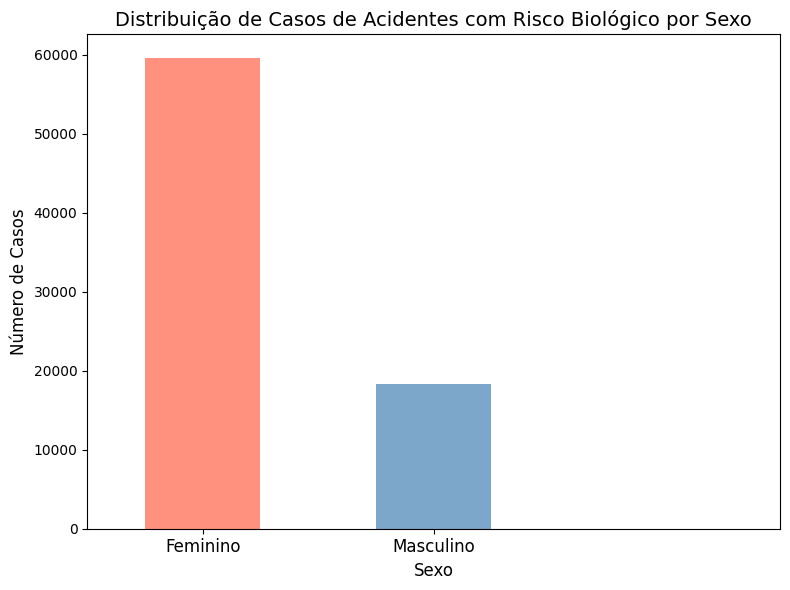

In [ ]:


# Contando o número de acidentes por sexo
casos_sexo = df_acbi_2023['CS_SEXO'].value_counts()

# Plotando o gráfico de barras
plt.figure(figsize=(8, 6))
casos_sexo.plot(kind='bar', color=['#FF6347', '#4682B4'], alpha=0.7)

# Ajustando os detalhes do gráfico
plt.title('Distribuição de Casos de Acidentes com Risco Biológico por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks([0, 1], ['Feminino', 'Masculino'], rotation=0, fontsize=12)
plt.tight_layout()

# Exibindo o gráfico
plt.show()

<ipython-input-19-7f1326fa9c7d>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casos_acbi_faixa = df_acbi_copy.groupby('Faixa_Etaria').size()
<ipython-input-19-7f1326fa9c7d>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casos_acgr_faixa = df_acgr_copy.groupby('Faixa_Etaria').size()


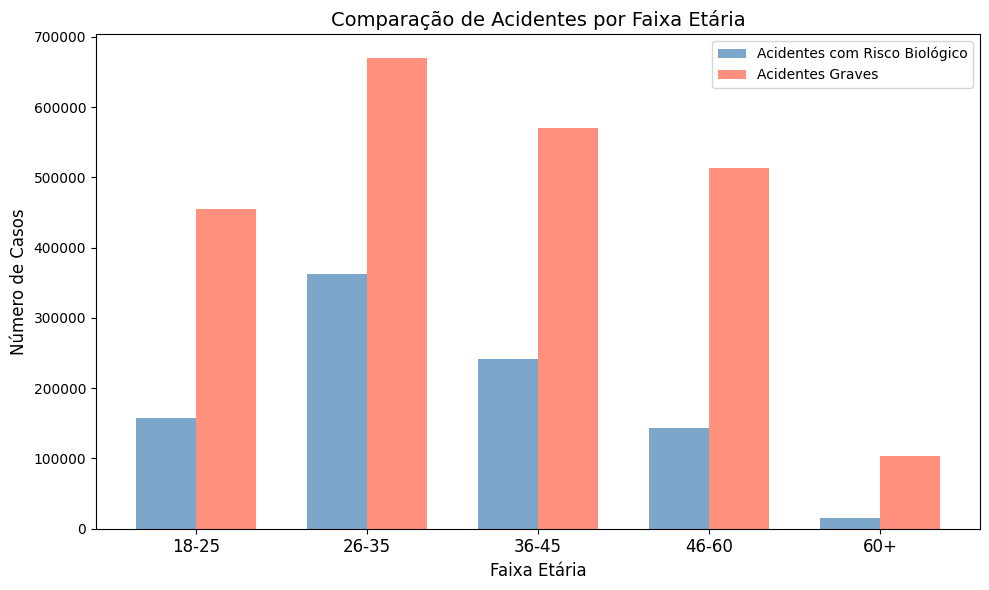

In [ ]:
# Definindo as faixas etárias
bins = [18, 25, 35, 45, 60, 100]  # Faixas etárias
labels = ['18-25', '26-35', '36-45', '46-60', '60+']  # Rótulos

# Adicionando a coluna de faixa etária para ambos os DataFrames
df_acbi_copy['Faixa_Etaria'] = pd.cut(df_acbi_copy['idade_anos'], bins=bins, labels=labels, right=False)
df_acgr_copy['Faixa_Etaria'] = pd.cut(df_acgr_copy['idade_anos'], bins=bins, labels=labels, right=False)

# Contando o número de casos por faixa etária para ambos os DataFrames
casos_acbi_faixa = df_acbi_copy.groupby('Faixa_Etaria').size()
casos_acgr_faixa = df_acgr_copy.groupby('Faixa_Etaria').size()

# Criando um gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(10, 6))

# Plotando os dados de acidentes com risco biológico e acidentes graves
bar_width = 0.35
index = range(len(labels))

bar1 = ax.bar(index, casos_acbi_faixa, bar_width, label='Acidentes com Risco Biológico', color='#4682B4', alpha=0.7)
bar2 = ax.bar([i + bar_width for i in index], casos_acgr_faixa, bar_width, label='Acidentes Graves', color='#FF6347', alpha=0.7)

# Ajustando os detalhes do gráfico
ax.set_title('Comparação de Acidentes por Faixa Etária', fontsize=14)
ax.set_xlabel('Faixa Etária', fontsize=12)
ax.set_ylabel('Número de Casos', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(labels, fontsize=12)
ax.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Exemplo de pré-processamento para a seleção de colunas
df_cluster = df_acgr_cru[['DT_NOTIFIC', 'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'ANO_NASC',
                           'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ID_OCUPA_N',
                           'SIT_TRAB', 'NUTEMPO', 'TPTEMPO', 'LOCAL_ACID', 'UF_EMP', 'MUN_EMP',
                           'TERCEIRIZA', 'HORA_JOR', 'MIN_JOR', 'TIPO_ACID']]

# Convertendo colunas de data
df_cluster['DT_NOTIFIC'] = pd.to_datetime(df_cluster['DT_NOTIFIC'])
df_cluster['Ano_Mes'] = df_cluster['DT_NOTIFIC'].dt.to_period('M')

df_cluster['NU_IDADE_N'] = decodifica_idade_SINAN(df_cluster.NU_IDADE_N, 'Y')

# Convertendo as colunas numéricas para o tipo adequado
numeric_cols = ['ANO_NASC', 'NUTEMPO', 'TPTEMPO', 'HORA_JOR', 'MIN_JOR', 'TERCEIRIZA']

# Convertendo para numérico, forçando erros para NaN e tratando
df_cluster[numeric_cols] = df_cluster[numeric_cols].apply(pd.to_numeric, errors='coerce')
# Garantindo que as variáveis numéricas sejam tratadas como float
df_cluster[numeric_cols] = df_cluster[numeric_cols].astype(float)

# Tratando valores nulos nas variáveis numéricas
df_cluster[numeric_cols] = df_cluster[numeric_cols].fillna(df_cluster[numeric_cols].mean())

# Tratando valores nulos nas variáveis numéricas (preenchendo com a média)
df_cluster[numeric_cols] = df_cluster[numeric_cols].fillna(df_cluster[numeric_cols].mean())



# Codificando variáveis categóricas
categorical_cols = ['SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
                    'CS_ESCOL_N', 'ID_OCUPA_N', 'SIT_TRAB', 'LOCAL_ACID', 'UF_EMP', 'MUN_EMP',
                    'TIPO_ACID']

# Preenchendo os valores nulos nas colunas categóricas (com o valor 'Desconhecido', por exemplo)
df_cluster[categorical_cols] = df_cluster[categorical_cols].fillna('Desconhecido')


encoder = OneHotEncoder(drop='first', sparse_output=True)
encoded_data = encoder.fit_transform(df_cluster[categorical_cols])

# Transformando variáveis numéricas
numeric_cols = ['ANO_NASC', 'NU_IDADE_N', 'NUTEMPO', 'TPTEMPO', 'HORA_JOR', 'MIN_JOR', 'TERCEIRIZA']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster[numeric_cols])

# Convertendo a matriz esparsa para uma matriz densa
encoded_data_dense = encoded_data.toarray()

# Combinando os dados transformados
processed_data = np.concatenate([encoded_data_dense, scaled_data], axis=1)


<ipython-input-14-de4b2c324603>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['DT_NOTIFIC'] = pd.to_datetime(df_cluster['DT_NOTIFIC'])
<ipython-input-14-de4b2c324603>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Ano_Mes'] = df_cluster['DT_NOTIFIC'].dt.to_period('M')
<ipython-input-14-de4b2c324603>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
# Definindo o número de clusters (ajuste conforme necessário)
kmeans = KMeans(n_clusters=3, random_state=42)

# Aplicando o KMeans nos dados
clusters = kmeans.fit_predict(processed_data)

# Adicionando os resultados ao DataFrame
df_cluster['Cluster'] = clusters

# Visualizando os resultados
df_cluster.groupby('Cluster').size()


,Ano_Mes,Total_Casos_ACBI
0,2006-01-01,10
1,2006-02-01,11
2,2006-03-01,13
3,2006-04-01,6
4,2006-05-01,9


In [ ]:
import matplotlib.pyplot as plt

# Plotando os clusters em um gráfico
plt.figure(figsize=(10, 6))
plt.scatter(df_cluster['NU_IDADE_N'], df_cluster['TPTEMPO'], c=df_cluster['Cluster'], cmap='viridis')
plt.xlabel('Idade')
plt.ylabel('Tempo de Trabalho')
plt.title('Clusterização de Acidentes por Idade e Tempo de Trabalho')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
df_acgr['NU_IDADE_N'].unique()

<StringArray>
['4026', '4030', '4035', '4031', '4053', '4039', '4025', '4051', '4038',
 '4045',
 ...
 '4120', '4113', '4121', '4109', '4119', '4112', '4118', '4123', '4116',
 '2509']
Length: 187, dtype: string